In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data from a normal distribution
np.random.seed(123)
x = np.random.normal(loc=1, scale=2, size=100)

# x = np.random.gamma(2, size=100)



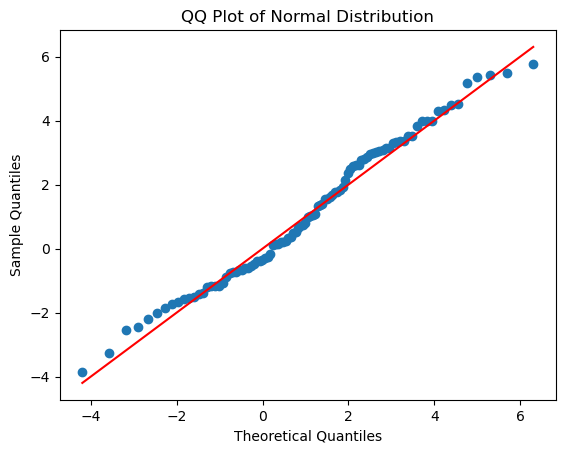

In [2]:
import scipy.stats as stats
# Create sorted quantiles of the data and the corresponding theoretical quantiles
# each x point gets a quantile in both the sorted quantiles,theoretical quantiles
sorted_data = np.sort(x.copy())
# ppf takes a percentage (quantile) and returns its corresponding value it occurs on 
# in the standard deviation
# quantiles with same size;random variable has same probability to occur in all quantiles
# resulting diffrent size for their corresponding value
mu,sigma = norm.fit(x)
norm_dist = stats.norm(loc=mu, scale=sigma)
theoretical_quantiles = norm_dist.ppf(np.linspace(0,1-1/x.shape[0], x.shape[0]))

# dist_prop,line_prop = stats.probplot(x.copy(), dist='norm',)
# theoretical_quantiles1, sorted_data1 = dist_prop
# slope, intercept, R = line_prop
# line = intercept + slope * theoretical_quantiles1
# plt.scatter(theoretical_quantiles1, sorted_data1)
# plt.plot(line, theoretical_quantiles1, color='r')

# Plot the QQ plot
plt.figure()
plt.scatter(theoretical_quantiles, sorted_data)
plt.plot(theoretical_quantiles, theoretical_quantiles, color='r')
plt.title('QQ Plot of Normal Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [3]:
import numpy as np
from scipy.stats import norm
from scipy.stats import kstest
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Generate some random data from a gamma distribution
data1 = np.random.normal(2,1,size=100)

# Generate some random data from a normal distribution
data2 = np.random.normal(size=100)

# Create a Q-Q plot of the two datasets
# qqplot(data1, data2, line='45')

# Determine the reference distribution
ref_dist = norm()
mu,sigma = norm.fit(data1)
norm_dist = norm(loc=mu, scale=sigma)
data1_norm = norm_dist.ppf(np.linspace(1/data1.shape[0],1-1/data1.shape[0],  data1.shape[0]))
mu,sigma = norm.fit(data2)
norm_dist = norm(loc=mu, scale=sigma)
data2_norm = norm_dist.ppf(np.linspace(1/data2.shape[0],1-1/data2.shape[0],  data2.shape[0]))



# Transform the quantiles of both datasets to match the quantiles of the reference distribution
# data1_norm = norm.ppf(np.linspace(0, 1, len(data1)+1)[:-1], loc=np.mean(data1), scale=np.std(data1))
# data2_norm = norm.ppf(np.linspace(0, 1, len(data2)+1)[:-1], loc=np.mean(data2), scale=np.std(data2))

# Fit the transformed first dataset to the reference distribution
fit_norm = norm.fit(data1_norm)

# Check the goodness of fit of the transformed first dataset to the reference distribution
ks_stat, ks_pval = kstest(data1_norm, 'norm', args=fit_norm)
print("KS test statistic: ", ks_stat, ", p-value: ", ks_pval)

# Plot the fitted dataset
x = np.linspace(np.min(data1), np.max(data1), 100)
y = ref_dist.pdf(x, loc=fit_norm[0], scale=fit_norm[1])
plt.plot(x, y, label="Fitted Distribution")
plt.legend()
plt.show()


KS test statistic:  0.01160515346555857 , p-value:  1.0


TypeError: pdf() got an unexpected keyword argument 'loc'

In [ ]:
import numpy as np
from scipy.stats import norm

# Generate two random datasets
data1 = np.random.normal(loc=10, scale=3, size=100)
data2 = np.random.normal(loc=20, scale=5, size=100)
# Sort both datasets in ascending order
data1_sorted = np.sort(data1)
data2_sorted = np.sort(data2)
# Calculate the quantiles of both datasets
data1_quantiles = np.percentile(data1, np.linspace(0, 100, len(data1)))
data2_quantiles = np.percentile(data2, np.linspace(0, 100, len(data2)))



# Find the corresponding quantile in data2 for each element in data1
data2_values = np.interp(data1_quantiles, data2_quantiles, data2_sorted)

# Use the inverse of data2's CDF to transform data1's quantiles to data2's quantiles
data1_transformed = norm.ppf(norm.cdf(data1_sorted), loc=np.mean(data2_values), scale=np.std(data2_values))

# # Print some statistics
print("Original data1 mean:", np.mean(data1), ", standard deviation:", np.std(data1))
print("Transformed data1 mean:", np.mean(data1_transformed), ", standard deviation:", np.std(data1_transformed))


Original data1 mean: 9.419543016563605 , standard deviation: 2.8134329226961503
Transformed data1 mean: inf , standard deviation: nan


/home/yishai/anaconda3/envs/tf_39/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
